<a href="https://colab.research.google.com/github/AbhishekYuvi/ML-Usecases/blob/master/Abhishek_Cardiovascular_Disease_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Cardiovascular Disease Detection

Importing libraries for preprocessing

Reading the data 'Cardiovascular Disease Detection'

In [1]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/Major

/content/drive/MyDrive/Major


In [4]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Major"

In [5]:
!kaggle datasets download -d sulianova/cardiovascular-disease-dataset

cardiovascular-disease-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
!unzip cardiovascular-disease-dataset.zip

Archive:  cardiovascular-disease-dataset.zip
replace cardio_train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [8]:
import pandas as pd
import numpy as np

In [9]:
Cardio = pd.read_csv('cardio_train.csv',sep=';')

In [10]:
Cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Removing insignificant data

In [11]:
Cardio['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

In [12]:
Cardio= Cardio.drop(columns='id')
Cardio

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [13]:
Cardio.info()
Cardio.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


Converting age which is represented in days to years

In [14]:
Cardio['age'] = Cardio['age']/365

In [15]:
print(Cardio.duplicated().sum())
Cardio.drop_duplicates(inplace=True)   #droping duplicates from dataset

24


Combining weight and height into BMI(body mass index) and dropping them

In [16]:
Cardio.rename(columns = {'ap_hi':'Systolic_bp'}, inplace = True)
Cardio.rename(columns = {'ap_lo':'Diastolic_bp'}, inplace = True)

Droping columns which are shown having very low correlation(negative) with target variable 

Reading the data into Input variable and Target variable

In [17]:
X=Cardio.drop(['cardio'],axis=1)
y=Cardio['cardio'].copy()

In [18]:
X.head(2)

,age,gender,height,weight,Systolic_bp,Diastolic_bp,cholesterol,gluc,smoke,alco,active
0,50.391781,2,168,62.0,110,80,1,1,0,0,1
1,55.419178,1,156,85.0,140,90,3,1,0,0,1


Using decesion tree classifier with maximum depth of 7

In [19]:
from sklearn.tree import DecisionTreeClassifier
D_tree=DecisionTreeClassifier(max_depth=7)
D_tree.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [20]:
from sklearn.model_selection import cross_val_score, StratifiedKFold


Using sklearn cross validation package to get accuracy, this cross_val_score package uses stratifiedK fold method for binary and multi class classification, since cardiovascular disease detection is binary classification.

In [21]:
scores1=cross_val_score(D_tree,X,y,cv=1000)
scores1.max()

0.8857142857142857

Inputs 
1. Age (in years)
2. Gender (1 female, 2 male)
3. height (in cm)
4. weight (in kgs)
5. Systolic_bp (systolic blood pressure)
6. Diastolic_bp (diabolic blood pressure)
7. cholestrol (cholostrol levels 1 normal, 2 above normal, 3 high)
8. glucose (glucose level 1 normal, 2 above normal, 3 high)


In [22]:
vals=[[48,2,173,75,70,100,1,1,0,0,1]] 
D_tree.predict(vals)

array([0])

In [23]:
from sklearn.model_selection import train_test_split as tts

In [24]:
 Xtrain, Xtest, ytrain, ytest = tts(X,y,test_size=0.3, random_state=0)

In [25]:
predictd=D_tree.predict(Xtest)

# Change Drive Path

In [26]:
Cardio_comp = pd.DataFrame({'Actual':ytest,'predicted':predictd})
Cardio_comp.head(7)

,Actual,predicted
25521,0,0
34513,0,0
69595,0,0
56818,0,0
47712,0,0
24927,0,0
24942,0,0


In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,predictd)

array([[8263, 2166],
       [3327, 7237]])

In [28]:
class_names=["No Disease","Disease"]

In [29]:
import matplotlib.pyplot as plt

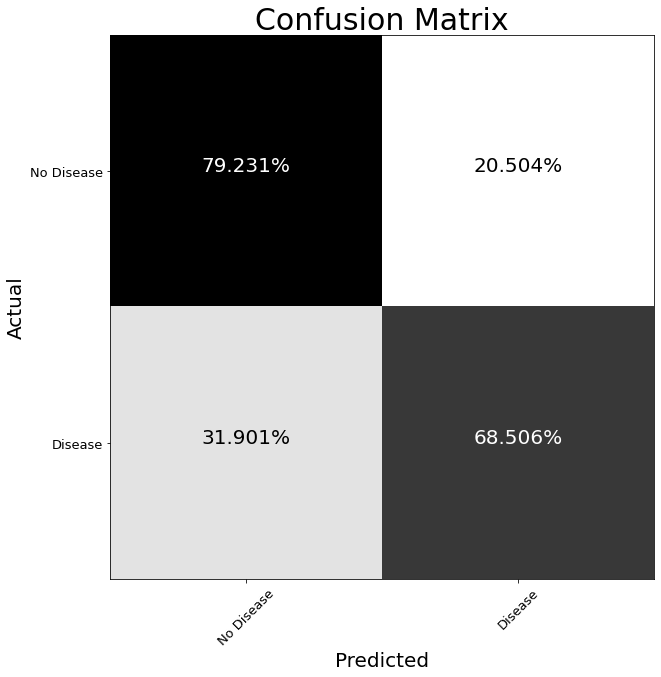

In [30]:
cm = confusion_matrix(ytest,predictd)
cm = cm.astype(float) / cm.sum(axis=1)[: np.newaxis]
plt.figure(figsize=(10,10))
plt.imshow(cm, cmap="Greys")
plt.xticks(np.arange(len(class_names)), class_names, rotation=45, fontsize=13)
plt.yticks(np.arange(len(class_names)), class_names, fontsize=13)
plt.xlabel("Predicted", fontsize =20)
plt.ylabel("Actual", fontsize =20)
plt.title("Confusion Matrix", fontsize=30)
for i in range(2):
    for j in range(2):
       plt.text(i,j, f"{cm[j,i]*100.0:.3f}%",  horizontalalignment='center', 
                                fontsize=20,
                                color="white" if cm[j,i]>0.5 else "black")

In [31]:
from sklearn.metrics import precision_score
precesion=precision_score(ytest, predictd, average='weighted')
print("Precesion : %5.2f" %(precesion*100))

Precesion : 74.15


In [32]:
from sklearn.metrics import recall_score
recall=recall_score(ytest, predictd, average='weighted')
print("Recall : %5.2f" %(recall*100))

Recall : 73.83


In [33]:
from sklearn.metrics import classification_report
print(classification_report(ytest,predictd))

              precision    recall  f1-score   support

           0       0.71      0.79      0.75     10429
           1       0.77      0.69      0.72     10564

    accuracy                           0.74     20993
   macro avg       0.74      0.74      0.74     20993
weighted avg       0.74      0.74      0.74     20993

